In [1]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
import glob

nctoolkit is using Climate Data Operators version 1.9.8


In [2]:
nct.deep_clean()

In [3]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [4]:
model = "Multimodel"
print(model)
experiment = "ssp585"
print(experiment)

Multimodel
ssp585


## Ice selection

### Multimodel ice region

In [14]:
files=glob.glob("Data/siconc_*_ice_region.nc")
files

['Data/siconc_CMCC-ESM2_ice_region.nc',
 'Data/siconc_IPSL-CM6A-LR_ice_region.nc']

In [16]:
ice = nct.open_data(files)
ice

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                       variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                              
Data/siconc_CMCC-ESM2_ice_region.nc      siconc   None    32400        1      None  None       F32
Data/siconc_IPSL-CM6A-LR_ice_region.nc   siconc   None    32400        1      None  None       F32

In [17]:
ice.ensemble_mean()
ice.to_nc("Data/siconc_Multimodel_ice_region.nc")

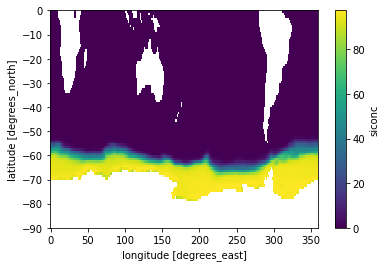

In [18]:
nc = xarray.open_dataset("Data/siconc_Multimodel_ice_region.nc")
nc["siconc"].plot()

### Ice region plot

In [54]:
variable = "siconc"

In [56]:
files=glob.glob("Data/{}_*_ice_extent.nc".format(variable))
files

['Data/siconc_CMCC-ESM2_ice_extent.nc',
 'Data/siconc_ACCESS-ESM1-5_ice_extent.nc',
 'Data/siconc_MPI-ESM1-2-HR_ice_extent.nc',
 'Data/siconc_IPSL-CM6A-LR_ice_extent.nc']

In [114]:
for i in range(4):
    globals()[f"model{i}"] = regex.search(r"(?<=Data/.*?_)[^_]*", files[i]).group()
    
    nc = xarray.open_dataset(files[i])
    nc = nc.sel(lat = slice(-90, -20))

    lat = nc['lat'].values 
    lon = nc['lon'].values
    globals()[f"var{i}"] = nc[variable].values

    globals()[f"x{i}"], globals()[f"y{i}"] = np.meshgrid(lon, lat)

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

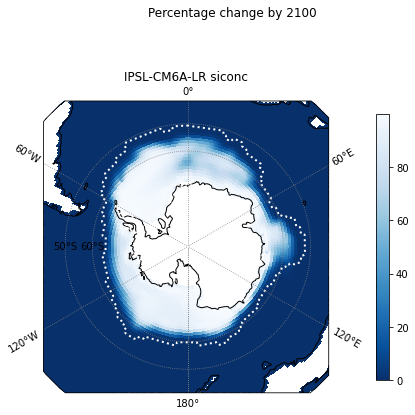

In [64]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

#divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var_old, 
              cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

ax1.add_geometries(ice['geometry'], 
                  cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                  facecolor = 'none', 
                  edgecolor = 'white',
                  linestyle = ':',
                  linewidth = 2)

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

#plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

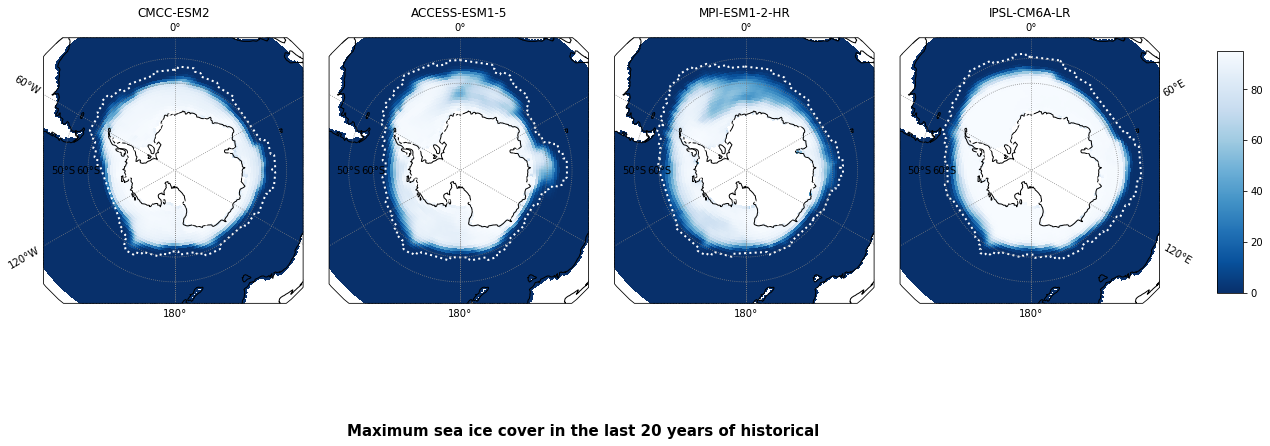

In [127]:
fig = plt.figure(figsize=(20,7))
fig.subplots_adjust(wspace = 0.1)
plt.suptitle("Maximum sea ice cover in the last 20 years of historical", fontweight = "bold", y=0, fontsize = 15)

gs = GridSpec(1, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[0, 3])


## Plot 1
ax1 = plt.subplot(1, 4, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax1.set_title("{}".format(model0))

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.left_labels = True
gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax1.pcolor(x0, y0, var0,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax1.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model0))
ax1.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 2
ax2 = plt.subplot(1, 4, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax2.set_title("{}".format(model1))

gl1 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax2.pcolor(x1, y1, var1,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax2.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model1))
ax2.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 3
ax3 = plt.subplot(1, 4, 3, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax3.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax3.set_title("{}".format(model2))

gl1 = ax3.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax3.pcolor(x2, y2, var2,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax3.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model2))
ax3.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)

## Plot 4
ax4 = plt.subplot(1, 4, 4, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax4.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

ax4.set_title("{}".format(model3))

gl1 = ax4.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = True
gl1.left_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])


p = ax4.pcolor(x3, y3, var3,
                  cmap = 'Blues_r', transform = cartopy.crs.PlateCarree() )

ax4.coastlines()
    
ice = gpd.read_file("Shapes/{}_ice_margin_remapped_improved.shp".format(model3))
ax4.add_geometries(ice['geometry'], 
                      cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                      facecolor = 'none', 
                      edgecolor = 'white',
                      linestyle = ':',
                      linewidth = 2)


fig.subplots_adjust(right=0.9) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.94, 0.26, 0.018, 0.48]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/Multimodel/ice_choice.png")

plt.show()

In [50]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

6.372402e-08 7.098874e-10


In [51]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

6.372402e-08 5.235929e-12


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

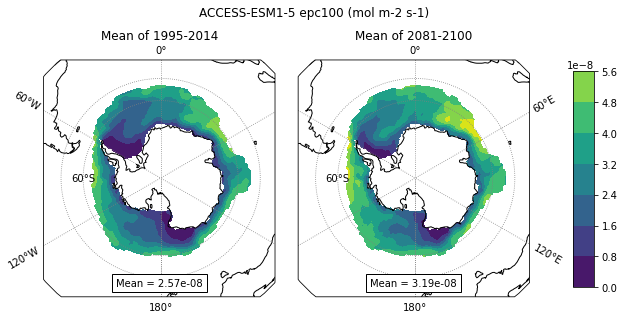

In [52]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2e}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2e}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## 
## epc100

### Percentage change


In [6]:
variable = "epc100"
print(variable)

epc100


In [7]:
files=glob.glob("Data/{}_*_percentage_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc',
 'Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc',
 'Data/epc100_CESM2-WACCM_ssp585_percentage_whole.nc',
 'Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc']

In [8]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                                     variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                            
Data/epc100_CMCC-ESM2_ssp585_percentage_whole.nc       epc100   None    18000        1      None  None       F32
Data/epc100_ACCESS-ESM1-5_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_whole.nc    epc100   None    18000        1      None  None       F32
Data/epc100_CESM2-WACCM_ssp585_percentage_whole.nc     epc100   None    18000        1      None  None       F32
Data/epc100_MPI-ESM1-2-HR_ssp585_percentage_whole.nc   epc100   None    18000        1      None  None       F32

In [9]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment))

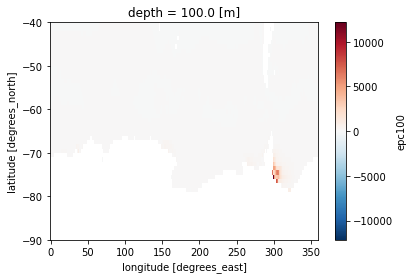

In [165]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment))
nc[variable].plot()

#### Zonal mean


In [142]:
files=glob.glob("Data/Shape/{}_*_{}_inc.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_inc.nc',
 'Data/Shape/epc100_CESM2-WACCM_ssp585_inc.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_inc.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_inc.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_inc.nc',
 'Data/Shape/epc100_Multimodel_ssp585_inc.nc']

In [143]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["inc"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [144]:
mean_inc = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [145]:
mean_inc[mean_inc < 0.8] = 0

In [146]:
sum(mean_inc[mean_inc < 0.8])

0.0

In [147]:
mean_inc.shape

(180, 360)

In [148]:
files=glob.glob("Data/Shape/{}_*_{}_dec.nc".format(variable, experiment))
files

['Data/Shape/epc100_ACCESS-ESM1-5_ssp585_dec.nc',
 'Data/Shape/epc100_CESM2-WACCM_ssp585_dec.nc',
 'Data/Shape/epc100_CMCC-ESM2_ssp585_dec.nc',
 'Data/Shape/epc100_IPSL-CM6A-LR_ssp585_dec.nc',
 'Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_dec.nc']

In [149]:
a = {}
for i in range(len(files)):
    nc = xarray.open_dataset(files[i])
    values = nc["dec"].values
    values = np.nan_to_num(values, nan=0)
    print(values)
    a[i] = values

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [150]:
mean_dec = (a[0] + a[1] + a[2] + a[3] + a[4])/5

In [151]:
mean_dec[mean_dec < 0.8] = 0

In [152]:
sum(mean_dec[mean_dec < 0.8])

0.0

In [153]:
mean_dec.shape

(180, 360)

In [154]:
agree = mean_dec + mean_inc

In [159]:
agree[agree == 0] = np.nan

In [160]:
agree

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [24]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 5
File contents:
                                              variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                     
Data/Shape/epc100_ACCESS-ESM1-5_ssp585_inc.nc      inc   None    64800        1      None  None       F32
Data/Shape/epc100_CESM2-WACCM_ssp585_inc.nc        inc   None    64800        1      None  None       F32
Data/Shape/epc100_CMCC-ESM2_ssp585_inc.nc          inc   None    64800        1      None  None       F32
Data/Shape/epc100_IPSL-CM6A-LR_ssp585_inc.nc       inc   None    64800        1      None  None       F32
Data/Shape/epc100_MPI-ESM1-2-HR_ssp585_inc.nc      inc   None    64800        1      None  None       F32

In [25]:
percentage.ensemble_mean()
percentage.to_nc("Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment),overwrite = True)

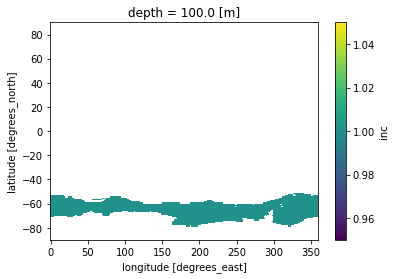

In [155]:
shade = xarray.open_dataset("Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment))
shade["inc"].plot()

In [156]:
shade["mean_inc"] = (("lat","lon"), mean_inc)

In [157]:
shade["mean_dec"] = (("lat","lon"), mean_dec)

In [161]:
shade["agree"] = (("lat","lon"), agree)

In [162]:
shade

<xarray.Dataset>
Dimensions:     (lon: 360, lat: 180, bnds: 2)
Coordinates:
  * lon         (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat         (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    depth       float64 ...
Dimensions without coordinates: bnds
Data variables:
    depth_bnds  (bnds) float64 ...
    inc         (lat, lon) float32 ...
    mean_inc    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    mean_dec    (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    agree       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 10 16:53:06 2022: cdo -L --sortname -z zip_9 -ensme...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

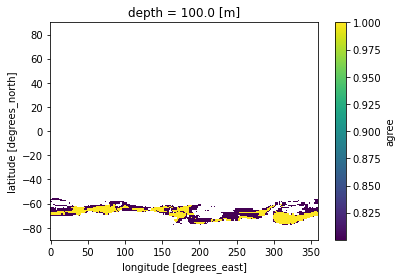

In [163]:
shade["agree"].plot()

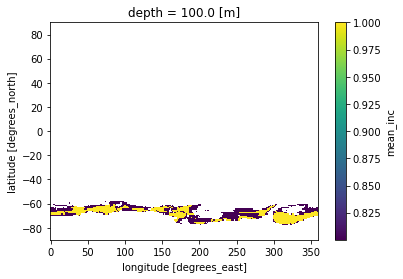

In [114]:
shade["mean_inc"].plot()

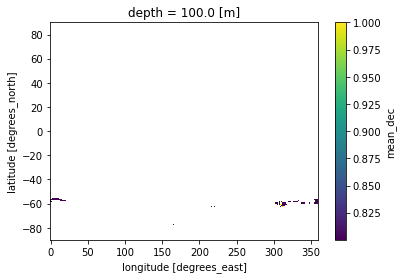

In [115]:
shade["mean_dec"].plot()

#### Plotting

In [166]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

41.96610641479493 -11.582770347595215
12159.164 -26.647753


In [167]:
lat_shade = shade['lat'].values 
lon_shade = shade['lon'].values
inc = shade["mean_inc"].values
dec = shade["mean_dec"].values
agree = shade["agree"].values


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

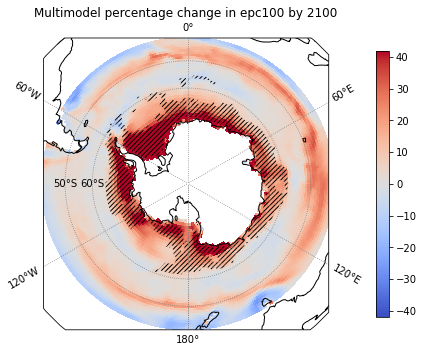

In [170]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


#plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("Multimodel percentage change in epc100 by 2100")

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )

density = 5
i = ax1.contourf(lon_shade, lat_shade, agree, transform= cartopy.crs.PlateCarree(),
    colors='none', hatches=[density*'/',density*'/'])

# d = ax1.contourf(lon_shade, lat_shade, dec, transform= cartopy.crs.PlateCarree(),
#     colors='none', hatches=[density*'*',density*'*'])

ax1.coastlines()

# theta = np.linspace(0, 2*np.pi, 100)
# center, radius = [0.5, 0.5], 0.5
# verts = np.vstack([np.sin(theta), np.cos(theta)]).T
# circle = mpath.Path(verts * radius + center)

# ax1.set_boundary(circle, transform=ax1.transAxes)

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

### Timeseries

In [181]:
files=glob.glob("csv/*_{}_whole.csv".format(variable))
files

['csv/ACCESS-ESM1-5_epc100_whole.csv',
 'csv/CESM2-WACCM_epc100_whole.csv',
 'csv/CMCC-ESM2_epc100_whole.csv',
 'csv/IPSL-CM6A-LR_epc100_whole.csv',
 'csv/MPI-ESM1-2-HR_epc100_whole.csv']

In [182]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)
type(df)

     Year        Annual        Summer        Winter          Model
0    2015  2.645978e-08  7.376076e-08  7.804582e-10  ACCESS-ESM1-5
1    2016  2.615075e-08  7.280450e-08  7.314332e-10  ACCESS-ESM1-5
2    2017  2.352553e-08  6.483753e-08  6.706267e-10  ACCESS-ESM1-5
3    2018  2.546953e-08  7.025123e-08  7.025097e-10  ACCESS-ESM1-5
4    2019  2.341411e-08  6.520531e-08  7.242160e-10  ACCESS-ESM1-5
..    ...           ...           ...           ...            ...
425  2096  4.636749e-08  1.382442e-07  7.456495e-10  MPI-ESM1-2-HR
426  2097  4.315267e-08  1.270635e-07  8.063698e-10  MPI-ESM1-2-HR
427  2098  4.367880e-08  1.297439e-07  8.212037e-10  MPI-ESM1-2-HR
428  2099  4.372008e-08  1.287595e-07  8.289716e-10  MPI-ESM1-2-HR
429  2100  4.298885e-08  1.292525e-07  7.690735e-10  MPI-ESM1-2-HR

[430 rows x 5 columns]


pandas.core.frame.DataFrame

### Annual

In [244]:
Annual = df.drop(columns=["Summer", "Winter"])
Annual

,Year,Annual,Model
0,2015,2.645978e-08,ACCESS-ESM1-5
1,2016,2.615075e-08,ACCESS-ESM1-5
2,2017,2.352553e-08,ACCESS-ESM1-5
3,2018,2.546953e-08,ACCESS-ESM1-5
4,2019,2.341411e-08,ACCESS-ESM1-5
...,...,...,...
425,2096,4.636749e-08,MPI-ESM1-2-HR
426,2097,4.315267e-08,MPI-ESM1-2-HR
427,2098,4.367880e-08,MPI-ESM1-2-HR
428,2099,4.372008e-08,MPI-ESM1-2-HR


In [245]:
Annual = Annual.pivot(index="Year", columns="Model", values="Annual")

In [256]:
Mean = {"Multimodel Mean": Annual.mean(axis=1)}
Mean = pd.DataFrame(Mean)
Mean

,Multimodel Mean
Year,
2015,4.226352e-08
2016,4.365233e-08
2017,4.291542e-08
2018,4.251616e-08
2019,4.185415e-08
...,...
2096,4.809557e-08
2097,4.791731e-08
2098,4.844922e-08


In [189]:
Annual['Mean'] = Annual.mean(axis=1)

In [257]:
Annual

Model,ACCESS-ESM1-5,CESM2-WACCM,CMCC-ESM2,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,2.645978e-08,2.549733e-08,7.032623e-08,4.641644e-08,4.261783e-08
2016,2.615075e-08,2.794355e-08,7.180962e-08,4.769978e-08,4.465793e-08
2017,2.352553e-08,2.615224e-08,7.189691e-08,4.969604e-08,4.330636e-08
2018,2.546953e-08,2.771431e-08,6.816416e-08,4.977203e-08,4.146077e-08
2019,2.341411e-08,2.466473e-08,6.906072e-08,4.872830e-08,4.340286e-08
...,...,...,...,...,...
2096,3.391489e-08,3.245584e-08,7.814815e-08,4.959149e-08,4.636749e-08
2097,3.265628e-08,3.278787e-08,8.146019e-08,4.952953e-08,4.315267e-08
2098,3.306615e-08,3.357530e-08,8.223990e-08,4.968596e-08,4.367880e-08


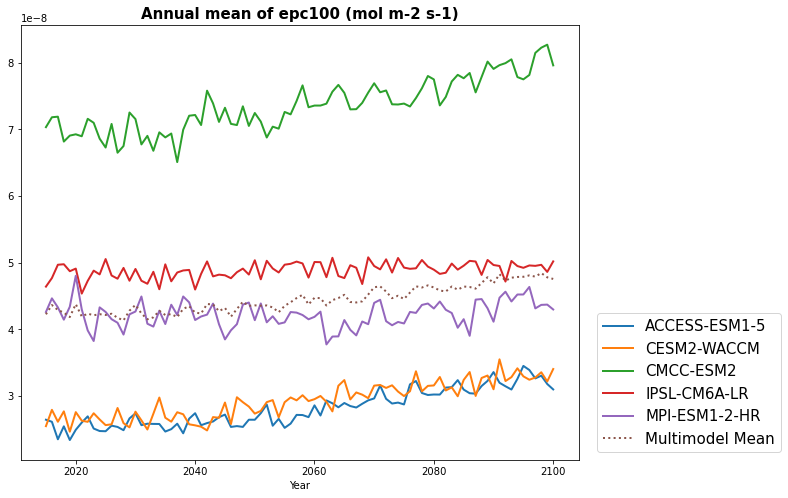

In [310]:
fig,ax = plt.subplots(figsize=(10,8))

plt.title("Annual mean of epc100 (mol m-2 s-1)", fontweight="bold", fontsize = 15)

ax = Annual.plot.line(ax = ax, figsize=(10,8), linewidth = 2)
ax2 = Mean.plot.line(ax = ax, linewidth = 2, linestyle = ":")
ax.legend(loc='lower left', bbox_to_anchor=(1.02, 0), prop={'size':15})

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment), bbox_inches='tight')

plt.show()

### Season

In [270]:
Summer = df.drop(columns=["Annual", "Winter"])
Summer

,Year,Summer,Model
0,2015,7.376076e-08,ACCESS-ESM1-5
1,2016,7.280450e-08,ACCESS-ESM1-5
2,2017,6.483753e-08,ACCESS-ESM1-5
3,2018,7.025123e-08,ACCESS-ESM1-5
4,2019,6.520531e-08,ACCESS-ESM1-5
...,...,...,...
425,2096,1.382442e-07,MPI-ESM1-2-HR
426,2097,1.270635e-07,MPI-ESM1-2-HR
427,2098,1.297439e-07,MPI-ESM1-2-HR
428,2099,1.287595e-07,MPI-ESM1-2-HR


In [271]:
Summer = Summer.pivot(index="Year", columns="Model", values="Summer")

In [272]:
Summer_Mean = {"Multimodel Mean": Summer.mean(axis=1)}
Summer_Mean = pd.DataFrame(Summer_Mean)
Summer_Mean

,Multimodel Mean
Year,
2015,9.568367e-08
2016,9.976994e-08
2017,9.641622e-08
2018,9.698595e-08
2019,9.577725e-08
...,...
2096,1.092696e-07
2097,1.077397e-07
2098,1.080400e-07


In [273]:
Summer

Model,ACCESS-ESM1-5,CESM2-WACCM,CMCC-ESM2,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,7.376076e-08,8.002868e-08,8.445667e-08,1.113828e-07,1.287895e-07
2016,7.280450e-08,8.751372e-08,8.593315e-08,1.164521e-07,1.361462e-07
2017,6.483753e-08,7.876227e-08,8.731174e-08,1.191069e-07,1.320627e-07
2018,7.025123e-08,8.661616e-08,8.369094e-08,1.198355e-07,1.245359e-07
2019,6.520531e-08,7.702710e-08,8.617058e-08,1.178402e-07,1.326430e-07
...,...,...,...,...,...
2096,9.687537e-08,9.161568e-08,1.053150e-07,1.142976e-07,1.382442e-07
2097,9.322735e-08,9.393756e-08,1.110673e-07,1.134029e-07,1.270635e-07
2098,9.261745e-08,9.293066e-08,1.122407e-07,1.126674e-07,1.297439e-07


In [274]:
Winter = df.drop(columns=["Annual", "Summer"])
Winter

,Year,Winter,Model
0,2015,7.804582e-10,ACCESS-ESM1-5
1,2016,7.314332e-10,ACCESS-ESM1-5
2,2017,6.706267e-10,ACCESS-ESM1-5
3,2018,7.025097e-10,ACCESS-ESM1-5
4,2019,7.242160e-10,ACCESS-ESM1-5
...,...,...,...
425,2096,7.456495e-10,MPI-ESM1-2-HR
426,2097,8.063698e-10,MPI-ESM1-2-HR
427,2098,8.212037e-10,MPI-ESM1-2-HR
428,2099,8.289716e-10,MPI-ESM1-2-HR


In [275]:
Winter = Winter.pivot(index="Year", columns="Model", values="Winter")

In [276]:
Winter_Mean = {"Multimodel Mean": Winter.mean(axis=1)}
Winter_Mean = pd.DataFrame(Winter_Mean)
Winter_Mean

,Multimodel Mean
Year,
2015,1.301429e-08
2016,1.311780e-08
2017,1.310301e-08
2018,1.250338e-08
2019,1.221343e-08
...,...
2096,1.284248e-08
2097,1.331413e-08
2098,1.339749e-08


In [325]:
Winter*10000000000

Model,ACCESS-ESM1-5,CESM2-WACCM,CMCC-ESM2,IPSL-CM6A-LR,MPI-ESM1-2-HR
Year,,,,,
2015,7.804582,5.094972,545.198731,83.923579,8.692821
2016,7.314332,5.169953,552.779795,81.902281,8.723648
2017,6.706267,4.828872,550.383952,83.932425,9.298960
2018,7.025097,5.852792,519.799066,83.326395,9.165420
2019,7.242160,4.912297,506.240845,83.532461,8.743987
...,...,...,...,...,...
2096,6.687990,6.805337,537.489662,83.684339,7.456495
2097,7.257636,6.943357,560.304052,83.137808,8.063698
2098,6.770727,6.729917,561.883873,86.278176,8.212037


/tmp/ipykernel_56542/771466002.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


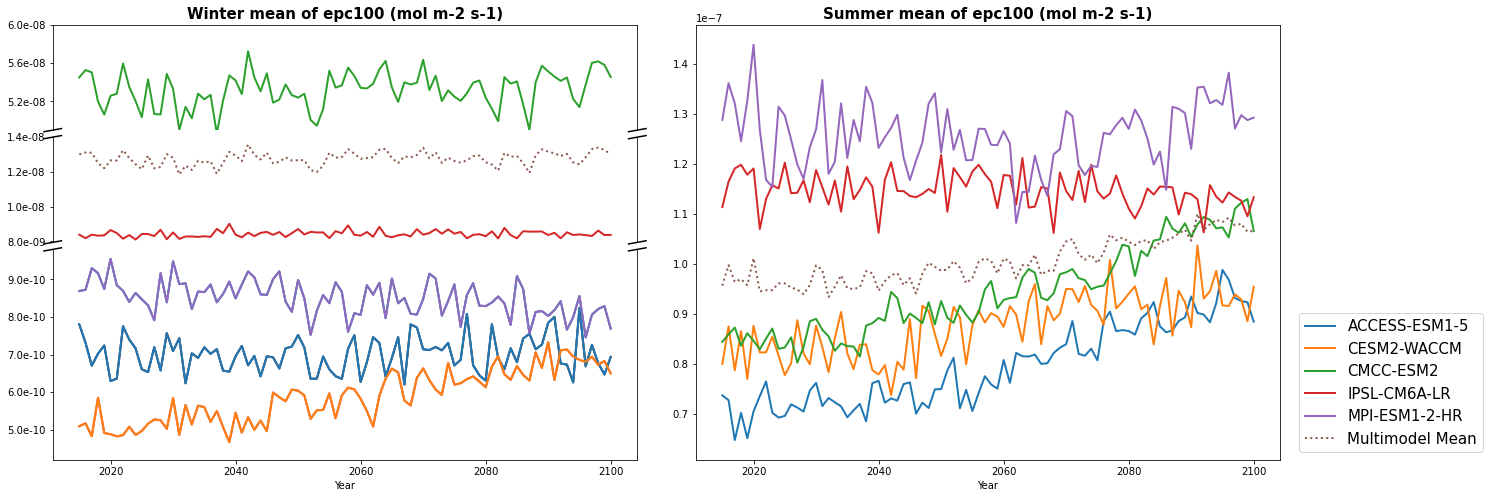

In [388]:
fig = plt.figure(constrained_layout=True, figsize=(22,8))
fig.subplots_adjust(hspace=0.05, wspace = 0.1)


gs = GridSpec(3, 2, figure=fig, height_ratios=[1,1,2])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[:,1])

ax4.set_title("Summer mean of epc100 (mol m-2 s-1)", fontweight = "bold", fontsize = 15)

Summer.plot.line(ax = ax4, linewidth = 2, legend=False)
Summer_Mean.plot.line(ax = ax4, linewidth = 2, linestyle = ":", legend=False)
ax4.legend(loc='lower left', bbox_to_anchor=(1.02, 0), prop={'size':15})

ax1.set_title("Winter mean of epc100 (mol m-2 s-1)", fontweight = "bold", fontsize = 15)

Winter.plot.line(ax = ax1, linewidth = 2, legend=False)
Winter.plot.line(ax = ax2, linewidth = 2, legend=False)
Winter_Mean.plot.line(ax = ax2, linewidth = 2, legend=False, linestyle = ":")
Winter.plot.line(ax = ax3, linewidth = 2, legend=False)
Winter.plot.line(ax = ax3, linewidth = 2, legend=False)
Winter.plot.line(ax = ax3, linewidth = 2, legend=False)

ax1.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1e'))
ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1e'))
ax3.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1e'))


ax1.set_ylim(4.9e-8, 6e-8) 
ax1.yaxis.set_major_locator(mticker.MaxNLocator(3))
ax2.set_ylim(7.95e-9, 1.4e-8)
ax3.set_ylim(4.2e-10, 9.8e-10) 

ax1.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax1.set_xticks([])
ax2.set_xticks([])

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs) 

kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax3.transAxes)  # switch to the bottom axes
ax3.plot((-d, +d), (1 - d/2, 1 + d/2), **kwargs)  # bottom-left diagonal
ax3.plot((1 - d, 1 + d), (1 - d/2, 1 + d/2), **kwargs) 


plt.savefig("output/{}/{}_{}_{}_mean_projection_season.png".format(model, variable, model, experiment), bbox_inches='tight')
plt.show()

### Others


In [13]:
files=glob.glob("Data/{}_*_absolute_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_ssp585_absolute_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_absolute_whole.nc']

In [14]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                  variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                         
Data/epc100_CMCC-ESM2_ssp585_absolute_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_absolute_whole.nc   epc100   None    18000        1      None  None       F32

In [15]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment))

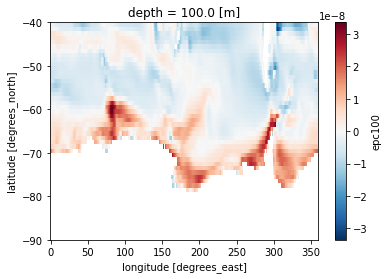

In [16]:
nc = xarray.open_dataset("Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment))
nc[variable].plot()

In [7]:
files=glob.glob("Data/{}_*_historical_20yr_whole.nc".format(variable))
files

['Data/epc100_CMCC-ESM2_historical_20yr_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_historical_20yr_whole.nc']

In [10]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                  variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                         
Data/epc100_CMCC-ESM2_historical_20yr_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_historical_20yr_whole.nc   epc100   None    18000        1      None  None       F32

In [11]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))

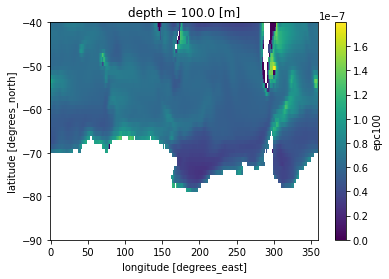

In [12]:
nc = xarray.open_dataset("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))
nc[variable].plot()

In [13]:
files=glob.glob("Data/{}_*_{}_20yr_whole.nc".format(variable, experiment))
files

['Data/epc100_CMCC-ESM2_ssp585_20yr_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_20yr_whole.nc']

In [14]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                              variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                     
Data/epc100_CMCC-ESM2_ssp585_20yr_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_20yr_whole.nc   epc100   None    18000        1      None  None       F32

In [15]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))

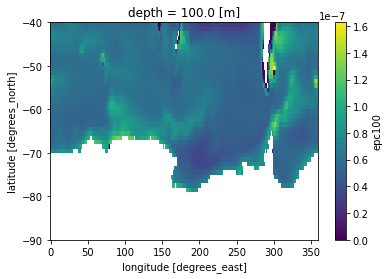

In [16]:
nc = xarray.open_dataset("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))
nc[variable].plot()

### Seasonal percentage difference

In [19]:
files=glob.glob("Data/{}_*_{}_percentage_summer_whole.nc".format(variable, experiment))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_summer_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_summer_whole.nc']

In [20]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                           variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                                  
Data/epc100_CMCC-ESM2_ssp585_percentage_summer_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_summer_whole.nc   epc100   None    18000        1      None  None       F32

In [21]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment))

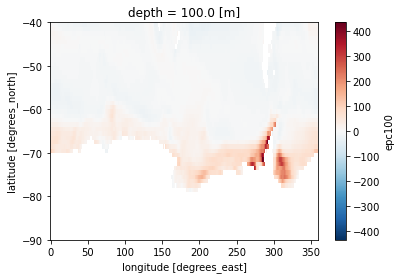

In [22]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment))
nc[variable].plot()

In [23]:
files=glob.glob("Data/{}_*_{}_percentage_winter_whole.nc".format(variable, experiment))
files

['Data/epc100_CMCC-ESM2_ssp585_percentage_winter_whole.nc',
 'Data/epc100_IPSL-CM6A-LR_ssp585_percentage_winter_whole.nc']

In [24]:
percentage = nct.open_data(files)
percentage

<nctoolkit.DataSet>:
Number of files: 2
File contents:
                                                           variable ntimes  npoints  nlevels long_name  unit data_type
file                                                                                                                  
Data/epc100_CMCC-ESM2_ssp585_percentage_winter_whole.nc      epc100   None    18000        1      None  None       F32
Data/epc100_IPSL-CM6A-LR_ssp585_percentage_winter_whole.nc   epc100   None    18000        1      None  None       F32

In [25]:
percentage.ensemble_mean()
percentage.to_nc("Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment))

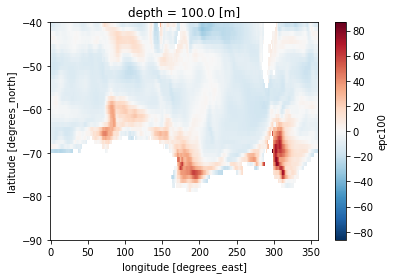

In [26]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment))
nc[variable].plot()

### Timeseries

In [27]:
files=glob.glob("csv/*_{}_whole.csv".format(variable))
files

['csv/CMCC-ESM2_epc100_whole.csv', 'csv/IPSL-CM6A-LR_epc100_whole.csv']

In [28]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

     Year        Annual        Summer        Winter         Model
0    2015  7.032623e-08  8.445667e-08  5.451987e-08     CMCC-ESM2
1    2016  7.180962e-08  8.593315e-08  5.527798e-08     CMCC-ESM2
2    2017  7.189691e-08  8.731174e-08  5.503840e-08     CMCC-ESM2
3    2018  6.816416e-08  8.369094e-08  5.197991e-08     CMCC-ESM2
4    2019  6.906072e-08  8.617058e-08  5.062408e-08     CMCC-ESM2
..    ...           ...           ...           ...           ...
167  2096  4.959149e-08  1.142976e-07  8.368434e-09  IPSL-CM6A-LR
168  2097  4.952953e-08  1.134029e-07  8.313781e-09  IPSL-CM6A-LR
169  2098  4.968596e-08  1.126674e-07  8.627818e-09  IPSL-CM6A-LR
170  2099  4.862315e-08  1.095399e-07  8.372303e-09  IPSL-CM6A-LR
171  2100  5.019859e-08  1.133375e-07  8.377878e-09  IPSL-CM6A-LR

[172 rows x 5 columns]


In [29]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)

## Correlation 

In [27]:
files=glob.glob("csv/*_{}_whole.csv".format(variable))
files

['csv/CMCC-ESM2_epc100_whole.csv', 'csv/IPSL-CM6A-LR_epc100_whole.csv']

In [28]:
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

     Year        Annual        Summer        Winter         Model
0    2015  7.032623e-08  8.445667e-08  5.451987e-08     CMCC-ESM2
1    2016  7.180962e-08  8.593315e-08  5.527798e-08     CMCC-ESM2
2    2017  7.189691e-08  8.731174e-08  5.503840e-08     CMCC-ESM2
3    2018  6.816416e-08  8.369094e-08  5.197991e-08     CMCC-ESM2
4    2019  6.906072e-08  8.617058e-08  5.062408e-08     CMCC-ESM2
..    ...           ...           ...           ...           ...
167  2096  4.959149e-08  1.142976e-07  8.368434e-09  IPSL-CM6A-LR
168  2097  4.952953e-08  1.134029e-07  8.313781e-09  IPSL-CM6A-LR
169  2098  4.968596e-08  1.126674e-07  8.627818e-09  IPSL-CM6A-LR
170  2099  4.862315e-08  1.095399e-07  8.372303e-09  IPSL-CM6A-LR
171  2100  5.019859e-08  1.133375e-07  8.377878e-09  IPSL-CM6A-LR

[172 rows x 5 columns]


In [29]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)